## Model Functionality Test
This notebook concentrates on testing the functionality of the model. The model is implemented in the `model/simple_model.py` file.

### Packages and Modules

In [1]:
%cd ..

D:\PyCharmProject\nna_24-25_pham


In [4]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from data.generators import *
from model.simple_model import ReLU_Network
from utils.trainer import train_model
from utils.evaluator import evaluate_model
from utils.visualizer import *

## 1D Convex Approximation

In [5]:
X_train, X_val, y_train, y_val = generate_1d_convex(n_samples=1000)

In [6]:
train_dataset = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).float())
val_dataset = TensorDataset(torch.tensor(X_val).float(), torch.tensor(y_val).float())

In [7]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

### Model Testing

In [8]:
model = ReLU_Network(input_dim=1, hidden_layers=4, hidden_units=20, output_dim=1)
model

ReLU_Network(
  (network): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=20, bias=True)
    (7): ReLU()
    (8): Linear(in_features=20, out_features=1, bias=True)
  )
)

Training Neural Network

In [9]:
logs = train_model(model, train_loader, val_loader, epochs=16, lr=0.01, device='cpu')

Training Configurations:
Device: cpu
Epochs: 16
Learning Rate: 0.01



Training:   0%|          | 0/16 [00:00<?, ?epoch/s]

Evaluating the model

In [10]:
y_pred, y_actual = evaluate_model(model, val_loader)

Evaluation Configurations:
Device: cpu



Evaluating:   0%|          | 0/13 [00:00<?, ?batch/s]

Visualizing the results

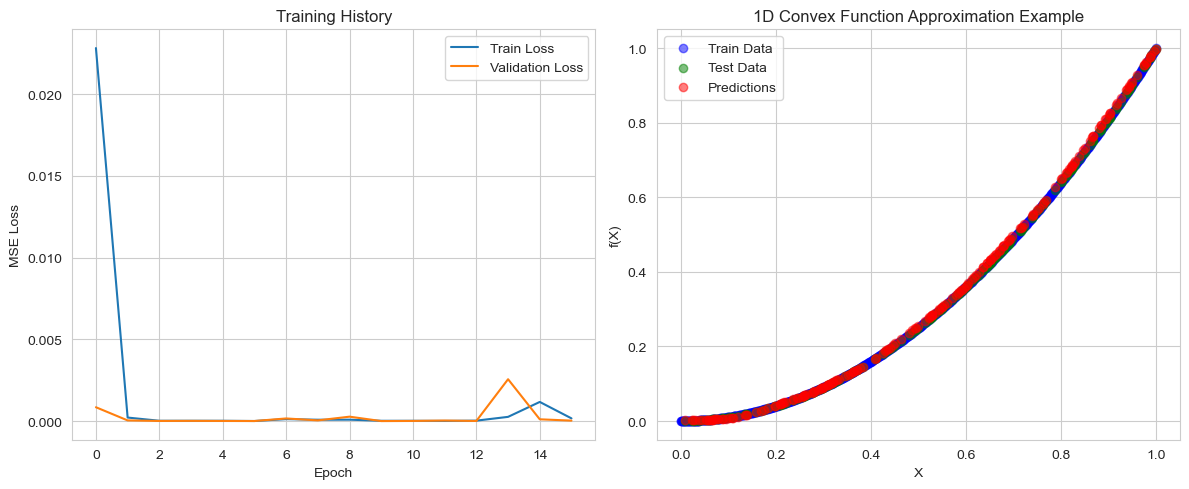

In [11]:
plot_results_1d(
    X_train, y_train, 
    X_val, y_val, 
    y_pred, 
    logs, 
    title='1D Convex Function Approximation Example'
)

## 1D Non-Convex Approximation

In [12]:
X_train, X_val, y_train, y_val = generate_1d_non_convex(n_samples=1000)

In [13]:
train_dataset = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).float())
val_dataset = TensorDataset(torch.tensor(X_val).float(), torch.tensor(y_val).float())

In [14]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

### Model Testing

In [15]:
model = ReLU_Network(input_dim=1, hidden_layers=4, hidden_units=20, output_dim=1)
model

ReLU_Network(
  (network): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=20, bias=True)
    (7): ReLU()
    (8): Linear(in_features=20, out_features=1, bias=True)
  )
)

Now we perform the same steps as before but with a non-convex dataset.

In [16]:
logs = train_model(model, train_loader, val_loader, epochs=16, lr=0.01, device='cpu')

Training Configurations:
Device: cpu
Epochs: 16
Learning Rate: 0.01



Training:   0%|          | 0/16 [00:00<?, ?epoch/s]

In [17]:
y_pred, y_actual = evaluate_model(model, val_loader)

Evaluation Configurations:
Device: cpu



Evaluating:   0%|          | 0/13 [00:00<?, ?batch/s]

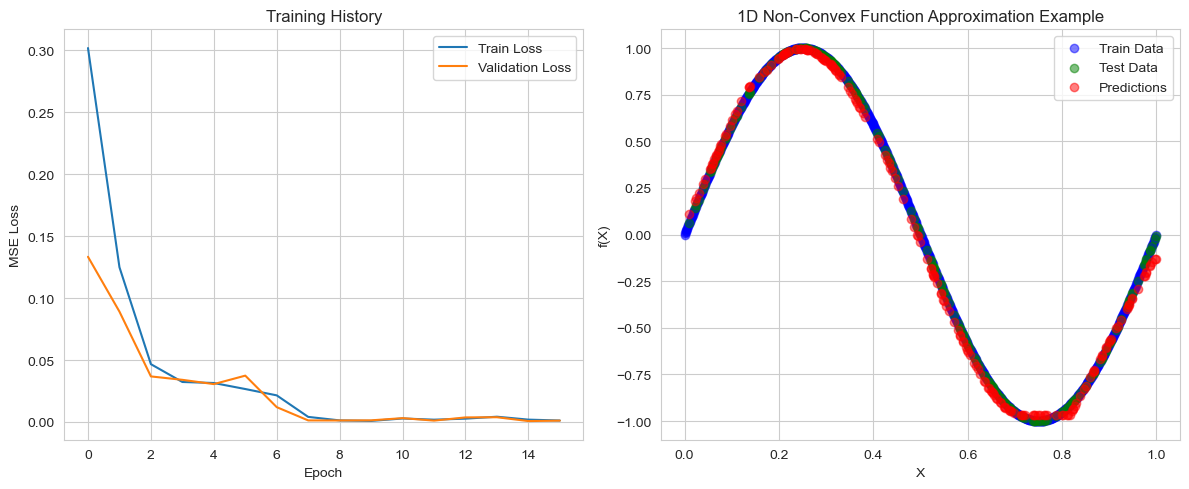

In [18]:
plot_results_1d(
    X_train, y_train, 
    X_val, y_val, 
    y_pred, 
    logs, 
    title='1D Non-Convex Function Approximation Example'
)

## 2D Convex Approximation

In [19]:
X_train, X_val, y_train, y_val = generate_2d_convex(n_samples=10000)

In [20]:
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                              torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32),
                            torch.tensor(y_val, dtype=torch.float32).unsqueeze(-1))

In [21]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

### Model Testing

In [22]:
model = ReLU_Network(input_dim=2, hidden_layers=3, hidden_units=64, output_dim=1)
model

ReLU_Network(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

The procedure is the same as before but with a 2D dataset.

In [23]:
logs = train_model(model, train_loader, val_loader, epochs=32, lr=0.01, device='cpu') # we increase the number of epochs, as the model is more complex

Training Configurations:
Device: cpu
Epochs: 32
Learning Rate: 0.01



Training:   0%|          | 0/32 [00:00<?, ?epoch/s]

In [24]:
y_pred, y_actual = evaluate_model(model, val_loader)

Evaluation Configurations:
Device: cpu



Evaluating:   0%|          | 0/125 [00:00<?, ?batch/s]

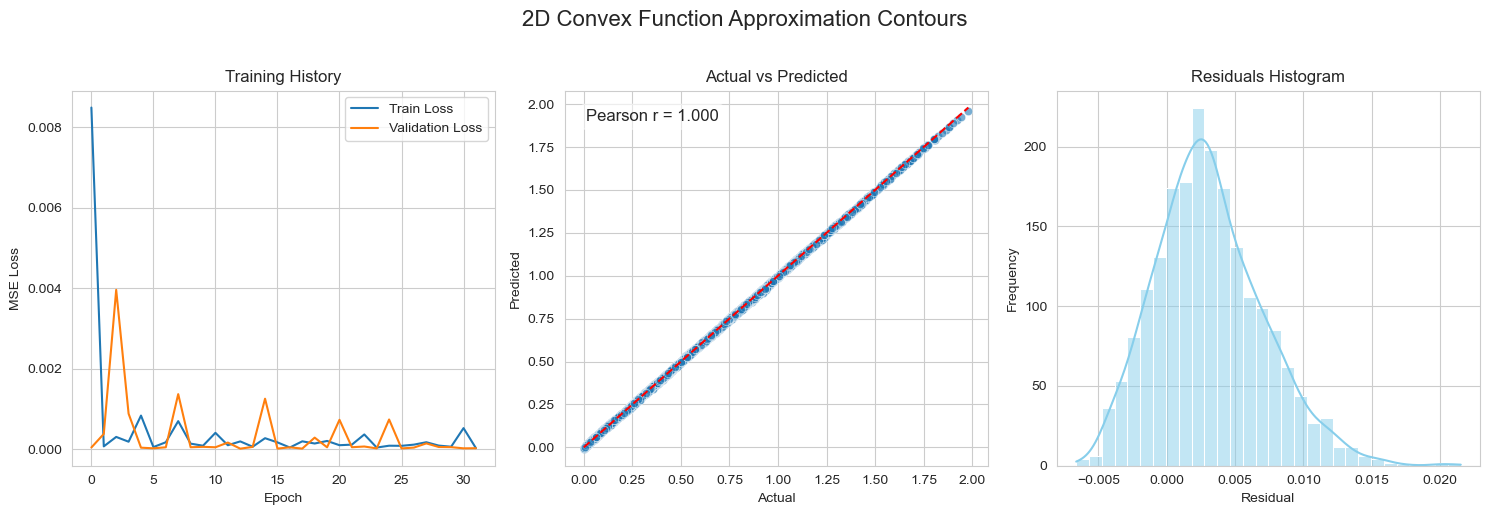

In [25]:
y_val_flat = y_val.flatten()
y_pred_flat = y_pred.flatten()

plot_results_2d(X_val, y_val_flat, y_pred_flat, 
                history=logs,
                title='2D Convex Function Approximation Contours',
                )

## 2D Non-Convex Approximation

In [26]:
X_train, X_val, y_train, y_val = generate_2d_non_convex(n_samples=10000)

In [27]:
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                              torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32),
                            torch.tensor(y_val, dtype=torch.float32).unsqueeze(-1))

In [28]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

### Model Testing

In [29]:
model = ReLU_Network(input_dim=2, hidden_layers=3, hidden_units=64, output_dim=1)
model

ReLU_Network(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [30]:
logs = train_model(model, train_loader, val_loader, epochs=64, lr=0.01, device='cpu') # we increase the number of epochs, as the model is on a more complex dataset

Training Configurations:
Device: cpu
Epochs: 64
Learning Rate: 0.01



Training:   0%|          | 0/64 [00:00<?, ?epoch/s]

In [31]:
y_pred, y_actual = evaluate_model(model, val_loader)

Evaluation Configurations:
Device: cpu



Evaluating:   0%|          | 0/125 [00:00<?, ?batch/s]

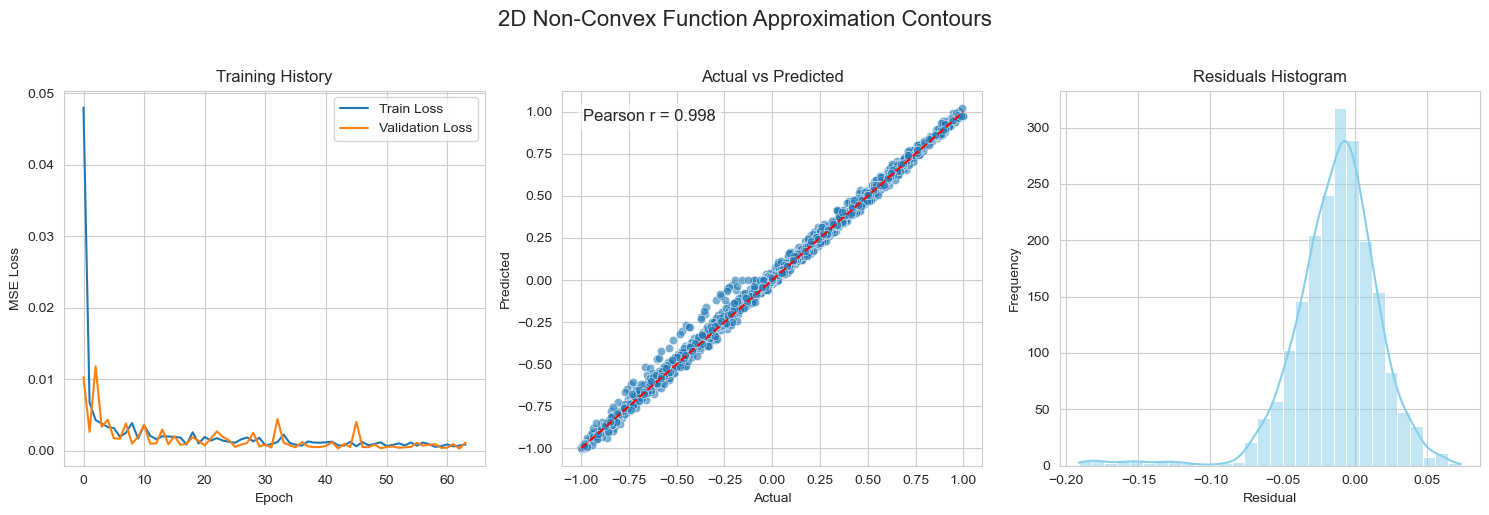

In [32]:
plot_results_2d(X_val, y_val.flatten(), y_pred.flatten(),
                history=logs,
                title='2D Non-Convex Function Approximation Contours')